In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
job_params = {    
    'notch_filt' :     None,
    'planes' :         n.arange(0,15),
    'n_ch_tif' : 15,
    'convert_plane_ids_to_channel_ids' : False,
    'fix_fastZ' : True,
    
    'n_init_files' :   3,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : False,
    'override_crosstalk' : None,
    'crosstalk_n_planes' : 10, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [16]:
subjects_dir =   '/mnt/zaru-subjects/'
expt_info = { 
    'subject':         'AH010',
    'date' :          '2024-01-17',
    'expnum' :         [4],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

In [17]:
job_params['fs']

17.8278

In [18]:
# Create the job
job = Job(savedir,exp_str, tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 3)

Job directory /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_4 already exists
Loading job directory for AH010_2024-01-17_4 in /mnt/md0/runs/AH010/2024-01-17
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param notch_filt
      Updating param planes
      Updating param n_ch_tif
      Updating param convert_plane_ids_to_channel_ids
      Updating param fix_fastZ
      Updating param n_init_files
      Updating param init_file_pool
      Updating param init_file_sample_method
      Updating param subtract_crosstalk
      Updating param override_crosstalk
      Updating param crosstalk_n_planes
      Updating param nonrigid
      Updating param smooth_sigma
      Updating param maxregshift
      Updating param reg_filter_pcorr
      Updating param generate_sample_registered_bins
      Updating param dtype
      Updating param tif_batch_size
      Updating param fs
   Updated main params fil

In [19]:
# optional parameters for initialization
# load 1 file to initialize, and select 200 frames randomly to do initalization on
job.params['n_init_files'] = 4
job.params['init_n_frames'] = None

   Saved a copy of params at /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_4/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_4/summary/summary.npy
   Loading init tifs with 15 channels
Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_of_470mw_00001_00023.tif
Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_of_470mw_00001_00050.tif
Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_of_470mw_00001_00032.tif
Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_of_470mw_00001_00057.tif
Loaded 4 files, total 1.94 GB
   Loaded init tifs
   Loaded movie with 400 frames and shape 15, 400, 433
         Enforcing positivity in mean image
   No crosstalk estimation or subtraction
   Estimating fusing shifts
   Using best fuse shift of 23
   Building ops file
   Saved init mov to /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_4/summar

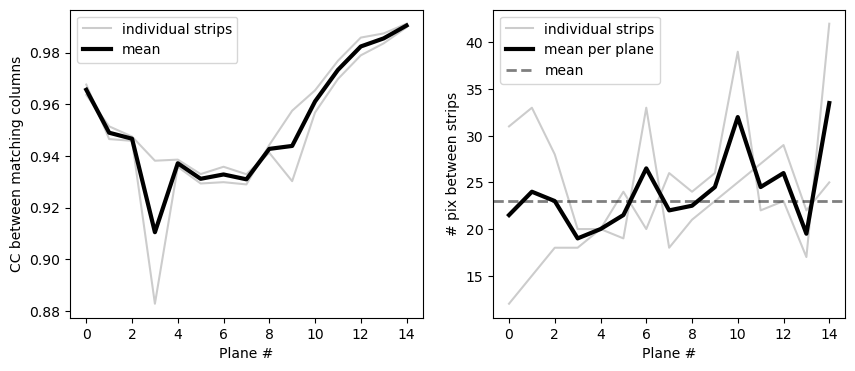

In [28]:
%%time
summary = job.run_init_pass()

In [29]:
summary = job.load_summary()

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f20519ce970>)

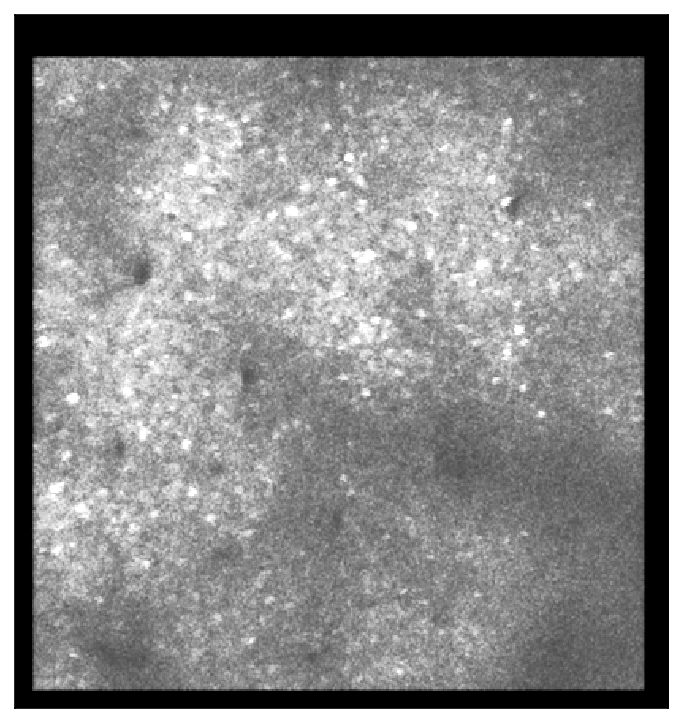

In [36]:
tfu.show_tif(summary['ref_img_3d'][8])

In [37]:
# split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

In [38]:
%%time
job.register_gpu()

      Found dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_4/registered_fused_data with tag registered_fused_data
Will analyze 58 tifs in 58 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 159.190 GB, Virtual Available: 344.648 GB, Virtual Used: 158.548 GB, Swap Used: 000.642 GB
Loading Batch 0 of 57
      Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_of_470mw_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.48 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 160.291 GB, Virtual Available: 343.547 GB, Virtual Used: 159.649 GB, Swap Used: 000.642 GB
         Memory after movie copied from threadTotal Used: 161.035 GB, Virtual Available: 342.803 GB, Virtual Used: 160.393 GB, Swap Used: 000.642 GB
         Memory after thread memory clearedTotal Used: 161.007 GB, Virtual Available: 342.831 GB, Virtual Used: 160.365 GB, Swap Used: 000.642 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 161.007 GB, Virtual Available: 342.831 GB, Virtual Used: 160.365 GB, Swap Used: 000.642 GB
      Loaded batch of size (15, 100, 400, 433)
      Sending frames 0-10 to GPU for rigid registration
      Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_of_470mw_00001_00002.tif
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         F

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.50 sec
         Shifted batch in 0.48 sec
         Freeing all blocks
      Completed rigid registration in 1.06 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.13 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.30 sec
         After GPU Batch:    Total Used: 163.207 GB, Virtual Available: 340.631 GB, Virtual Used: 162.565 GB, Swap Used: 000.642 GB
      Sending frames 80-90 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.38 sec
         After GPU Batch:    Total Used: 169.531 GB, Virtual Available: 334.307 GB, Virtual Used: 168.889 GB, Swap Used: 000.642 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.17 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 1.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.16 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.35 sec
         After GPU Batch:    Total Used: 165.659 GB, Virtual Available: 338.179 GB, Virtual Used: 165.017 GB, Swap Used: 000.642 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.04 sec
         Freeing all blocks
      Completed rigid registration in 0.14 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.28 sec
         After GPU Batch:    Total Used: 169.116 GB, Virtual Available: 334.722 GB, Virtual Used: 168.474 GB, Swap Used: 000.642 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.13 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.18 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.67 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 167.411 GB, Virtual Available: 336.427 GB, Virtual Used: 166.769 GB, Swap Used: 000.642 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



      Sending frames 50-60 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.39 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.47 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.52 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.30 sec
         After GPU Batch:    Total Used: 168.108 GB, Virtual Available: 335.730 GB, Virtual Used: 167.466 GB, Swap Used: 000.642 GB
      

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.37 sec
         After GPU Batch:    Total Used: 168.666 GB, Virtual Available: 335.172 GB, Virtual Used: 168.024 GB, Swap Used: 000.642 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.13 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.19 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Saved in 0.53 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After full batch saving:Total Used: 163.723 GB, Virtual Available: 340.115 GB, Virtual Used: 163.081 GB, Swap Used: 000.642 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Memory at batch 7.  Total Used: 163.887 GB, Virtual Available: 339.951 GB, Virtual Used: 163.245 GB, Swap Used: 000.642 GB
Loading Batch 7 of 57


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Memory at batch 7.  Total Used: 163.887 GB, Virtual Available: 339.951 GB, Virtual Used: 163.245 GB, Swap Used: 000.642 GB
Loading Batch 7 of 57
   Loaded 1 files, total 0.48 GB
   Batch 7 IO thread joined
         Memory after IO thread joinTotal Used: 163.403 GB, Virtual Available: 340.435 GB, Virtual Used: 162.761 GB, Swap Used: 000.642 GB
         Memory after movie copied from threadTotal Used: 163.690 GB, Virtual Available: 340.148 GB, Virtual Used: 163.048 GB, Swap Used: 000.642 GB
         Memory after thread memory clearedTotal Used: 163.418 GB, Virtual Available: 340.420 GB, Virtual Used: 162.776 GB, Swap Used: 000.642 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 163.419 GB, Virtual Available: 340.419 GB, Virtual Used: 162.777 GB, Swap Used: 000.642 GB
      Loaded batch of size (15, 100, 400, 433)
      Sending frames 0-10 to GPU for rigid registration
      Loading /mnt/zaru-subjects/AH010/2024-01-17/4/mm2_0p40pixum_laser60p_

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.35 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.34 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.34 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.38 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.07 sec   Non rigid transformed (on CPU) in 0.32 sec
         After GPU Batch:    Total Used: 167.058 GB, Virtual Available: 336.784 GB, Virtual Used: 166.412 GB, Swap Used: 000.646 GB
      Sending frames 90-100 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.47 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.47 sec
         Registered batch in 0.25 sec
         Shifted batch in 0.11 sec
         Freeing all blocks
      Completed rigid registration in 1.25 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.31 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.35 sec
         After GPU Batch:    Total Used: 167.409 GB, Virtual Available: 336.432 GB, Virtual Used: 166.764 GB, Swap Used: 000.646 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing a

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.35 sec
         After GPU Batch:    Total Used: 166.596 GB, Virtual Available: 337.246 GB, Virtual Used: 165.950 GB, Swap Used: 000.646 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.11 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.17 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.07 sec

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.84 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.29 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.34 sec
         After GPU Batch:    Total Used: 167.455 GB, Virtual Available: 336.386 GB, Virtual Used: 166.810 GB, Swap Used: 000.646 GB
      Sending frames 30-40 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.13 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.08 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.07 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.73 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.19 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.88 sec
         After GPU Batch:    Total Used: 169.245 GB, Virtual Available: 334.597 GB, Virtual Used: 168.599 GB, Swap Used: 000.646 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.57 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 1.11 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.25 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.34 sec
         After GPU Batch:    Total Used: 167.222 GB, Virtual Available: 336.619 GB, Virtual Used: 166.577 GB, Swap Used: 000.646 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.30 sec
         After GPU Batch:    Total Used: 167.952 GB, Virtual Available: 335.890 GB, Virtual Used: 167.306 GB, Swap Used: 000.646 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.18 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.23 sec
         Shifted batch in 0.12 sec
         Freeing all blocks
      Completed rigid registration in 1.18 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.24 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 165.229 GB, Virtual Available: 338.613 GB, Virtual Used: 164.583 GB, Swap Used: 000.646 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.31 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.39 sec
         Shifted batch in 0.25 sec
         Freeing all blocks
      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.26 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 167.064 GB, Virtual Available: 336.777 GB, Virtual Used: 166.419 GB, Swap Used: 000.646 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.38 sec
         After GPU Batch:    Total Used: 166.867 GB, Virtual Available: 336.981 GB, Virtual Used: 166.215 GB, Swap Used: 000.652 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.18 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.42 sec
         After GPU Batch:    Total Used: 168.097 GB, Virtual Available: 335.751 GB, Virtual Used: 167.445 GB, Swap Used: 000.652 GB
      Sending frames 30-40 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.13 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.19 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 1.09 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.22 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.60 sec
         After GPU Batch:    Total Used: 171.313 GB, Virtual Available: 332.534 GB, Virtual Used: 170.662 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.24 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.05 sec
         Freeing all blocks
      Completed rigid registration in 0.34 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.60 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.16 sec
         Shifted batch in 0.10 sec
         Freeing all blocks
      Completed rigid registration in 1.19 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.26 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.34 sec
         After GPU Batch:    Total Used: 164.872 GB, Virtual Available: 338.976 GB, Virtual Used: 164.220 GB, Swap Used: 000.652 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.26 sec
         After GPU Batch:    Total Used: 167.615 GB, Virtual Available: 336.233 GB, Virtual Used: 166.963 GB, Swap Used: 000.652 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.18 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.72 sec
         Shifted batch in 0.52 sec
         Freeing all blocks
      Completed rigid registration in 1.50 sec
         Allocated GPU array for non-rigid reg in 0.04 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.59 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.25 sec
         After GPU Batch:    Total Used: 165.162 GB, Virtual Available: 338.686 GB, Virtual Used: 164.510 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.39 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.30 sec
         Shifted batch in 0.17 sec
         Freeing all blocks
      Completed rigid registration in 1.20 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.26 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.30 sec
         After GPU Batch:    Total Used: 164.047 GB, Virtual Available: 339.801 GB, Virtual Used: 163.395 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.25 sec
         After GPU Batch:    Total Used: 168.000 GB, Virtual Available: 335.848 GB, Virtual Used: 167.348 GB, Swap Used: 000.652 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.18 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.28 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.08 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.65 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.44 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Split movie into blocks in 0.07 sec
   Clipped movie in 0.00 sec
   Non rigid transformed (on CPU) in 0.36 sec
         After GPU Batch:    Total Used: 167.204 GB, Virtual Available: 336.644 GB, Virtual Used: 166.552 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.13 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.04 sec
         Freeing all blocks
      Completed rigid registration in 0.23 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.60 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.29 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.07 sec
   Computed SNR and smoothed phase corrs in 0.01 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.21 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.33 sec
         After GPU Batch:    Total Used: 167.424 GB, Virtual Available: 336.423 GB, Virtual Used: 166.773 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.05 sec
         Freeing all blocks
      Completed rigid registration in 0.14 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.11 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.37 sec
         Shifted batch in 0.39 sec
         Freeing all blocks
      Completed rigid registration in 1.17 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.23 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.29 sec
         After GPU Batch:    Total Used: 163.030 GB, Virtual Available: 340.818 GB, Virtual Used: 162.378 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.42 sec
         Shifted batch in 0.63 sec
         Freeing all blocks
      Completed rigid registration in 1.38 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.44 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.23 sec
         After GPU Batch:    Total Used: 165.079 GB, Virtual Available: 338.768 GB, Virtual Used: 164.427 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.36 sec
         After GPU Batch:    Total Used: 168.256 GB, Virtual Available: 335.592 GB, Virtual Used: 167.604 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.13 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.19 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.16 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.45 sec
         Shifted batch in 0.27 sec
         Freeing all blocks
      Completed rigid registration in 1.19 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.25 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
   Non rigid transformed (on CPU) in 0.33 sec
         After GPU Batch:    Total Used: 162.933 GB, Virtual Available: 340.915 GB, Virtual Used: 162.281 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to en

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.33 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



         Subtracting min pix vals to enforce positivity
         Registered batch in 0.32 sec
         Shifted batch in 0.19 sec
         Freeing all blocks
      Completed rigid registration in 1.24 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.05 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.32 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 165.009 GB, Virtual Available: 338.839 GB, Virtual Used: 164.357 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and pad

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.54 sec
         After GPU Batch:    Total Used: 170.902 GB, Virtual Available: 332.945 GB, Virtual Used: 170.251 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.43 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.93 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.98 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.42 sec
         After GPU Batch:    Total Used: 166.513 GB, Virtual Available: 337.335 GB, Virtual Used: 165.861 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.04 sec
         Freeing all blocks
      Completed rigid registration in 0.14 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.19 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.14 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.13 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.08 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.67 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.21 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.32 sec
         After GPU Batch:    Total Used: 166.522 GB, Virtual Available: 337.326 GB, Virtual Used: 165.870 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 1.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.02 sec
         Shifted batch in 0.03 sec
         Freeing all blocks


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 1.45 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.52 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.29 sec
         After GPU Batch:    Total Used: 166.418 GB, Virtual Available: 337.430 GB, Virtual Used: 165.766 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shi

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.33 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.24 sec
         Shifted batch in 0.24 sec
         Freeing all blocks
      Completed rigid registration in 1.21 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.27 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.30 sec
         After GPU Batch:    Total Used: 164.453 GB, Virtual Available: 339.395 GB, Virtual Used: 163.801 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 165.456 GB, Virtual Available: 338.392 GB, Virtual Used: 164.804 GB, Swap Used: 000.652 GB
      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 0.80 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.88 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.94 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.28 sec
         After GPU Batch:    Total Used: 164.025 GB, Virtual Available: 339.823 GB, Virtual Used: 163.373 GB, Swap Used: 000.652 GB
      

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.30 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.38 sec
         Shifted batch in 0.25 sec
         Freeing all blocks
      Completed rigid registration in 1.56 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.62 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.24 sec
         After GPU Batch:    Total Used: 165.212 GB, Virtual Available: 338.636 GB, Virtual Used: 164.560 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.11 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 1.09 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.08 sec
      Computed non-rigid shifts in 1.31 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.32 sec
         After GPU Batch:    Total Used: 167.076 GB, Virtual Available: 336.771 GB, Virtual Used: 166.425 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 0.74 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.09 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 1.11 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.16 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 163.823 GB, Virtual Available: 340.024 GB, Virtual Used: 163.172 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.54 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 168.225 GB, Virtual Available: 335.623 GB, Virtual Used: 167.573 GB, Swap Used: 000.652 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.13 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.05 sec
         Freeing all blocks
      Completed rigid registration in 0.25 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.30 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.31 sec
         Shifted batch in 0.39 sec
         Freeing all blocks


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 1.22 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.28 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.35 sec
         After GPU Batch:    Total Used: 169.267 GB, Virtual Available: 334.581 GB, Virtual Used: 168.615 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.05 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shi

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.46 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 164.177 GB, Virtual Available: 339.671 GB, Virtual Used: 163.525 GB, Swap Used: 000.652 GB
      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 0.57 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.03 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.68 sec
         Allocated GPU array for non-rigid reg in 0.03 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.74 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.29 sec
         After GPU Batch:    Total Used: 162.866 GB, Virtual Available: 340.982 GB, Virtual Used: 162.214 GB, Swap Used: 000.652 GB
      

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.33 sec
         After GPU Batch:    Total Used: 163.559 GB, Virtual Available: 340.289 GB, Virtual Used: 162.907 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.18 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.35 sec
         Shifted batch in 0.69 sec
         Freeing all blocks
      Completed rigid registration in 1.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.04 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.18 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.28 sec
         After GPU Batch:    Total Used: 160.131 GB, Virtual Available: 343.717 GB, Virtual Used: 159.479 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.39 sec
         Shifted batch in 0.60 sec
         Freeing all blocks
      Completed rigid registration in 1.07 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.12 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.28 sec
         After GPU Batch:    Total Used: 160.112 GB, Virtual Available: 343.736 GB, Virtual Used: 159.460 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.53 sec
         Shifted batch in 0.48 sec
         Freeing all blocks
      Completed rigid registration in 1.09 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.15 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.29 sec
         After GPU Batch:    Total Used: 160.100 GB, Virtual Available: 343.747 GB, Virtual Used: 159.449 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.13 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.06 sec

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.06 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.13 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.60 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.09 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Split movie into blocks in 0.06 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 162.782 GB, Virtual Available: 341.065 GB, Virtual Used: 162.131 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.11 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.49 sec
         Shifted batch in 0.43 sec
         Freeing all blocks
      Completed rigid registration in 1.11 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.16 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.28 sec
         After GPU Batch:    Total Used: 160.172 GB, Virtual Available: 343.676 GB, Virtual Used: 159.520 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.32 sec
         Shifted batch in 0.64 sec
         Freeing all blocks
      Completed rigid registration in 1.03 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.09 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.30 sec
         After GPU Batch:    Total Used: 160.145 GB, Virtual Available: 343.703 GB, Virtual Used: 159.493 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.21 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.23 sec
         Shifted batch in 0.37 sec
         Freeing all blocks
      Completed rigid registration in 1.12 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.17 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.28 sec
         After GPU Batch:    Total Used: 159.962 GB, Virtual Available: 343.886 GB, Virtual Used: 159.310 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.35 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.29 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.15 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.14 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Split movie into blocks in 0.07 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 162.453 GB, Virtual Available: 341.395 GB, Virtual Used: 161.801 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.11 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.41 sec
         Shifted batch in 0.59 sec
         Freeing all blocks
      Completed rigid registration in 1.07 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 1.13 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.29 sec
         After GPU Batch:    Total Used: 159.978 GB, Virtual Available: 343.870 GB, Virtual Used: 159.326 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.94 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.14 sec
      Computed non-rigid shifts in 1.21 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.30 sec
         After GPU Batch:    Total Used: 162.642 GB, Virtual Available: 341.205 GB, Virtual Used: 161.991 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.11 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.63 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.07 sec
      Computed non-rigid shifts in 1.15 sec
      Transferred shifted mov of shape (10, 15, 438, 413) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.31 sec
         After GPU Batch:    Total Used: 162.671 GB, Virtual Available: 341.177 GB, Virtual Used: 162.019 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.16 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.24 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 1.32 sec
         After GPU Batch:    Total Used: 163.815 GB, Virtual Available: 340.033 GB, Virtual Used: 163.163 GB, Swap Used: 000.652 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.14 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.19 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.05 GB
   Non rigid transformed (on CPU) in 1.17 sec
         After GPU Batch:    Total Used: 158.644 GB, Virtual Available: 345.204 GB, Virtual Used: 157.992 GB, Swap Used: 000.652 GB
      Sending frames 10-20 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 438, 413; 0.20 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.03 sec
         Freeing all blocks
      Completed rigid registration in 0.10 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.03 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.

In [39]:
mov_full = job.get_registered_movie('registered_fused_data', 'fused')
im_full = mov_full[:,:200].mean(axis=1).compute()

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f20518a4040>)

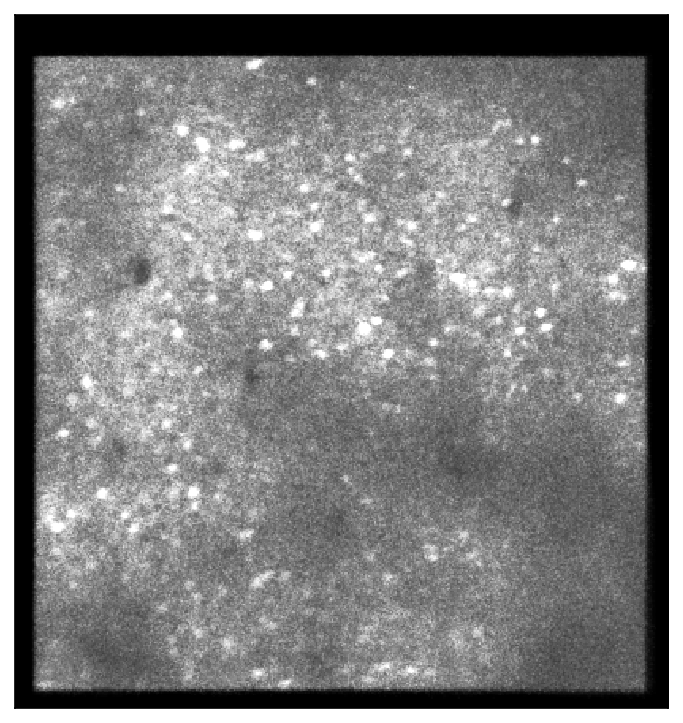

In [40]:
tfu.show_tif(im_full[8])

In [76]:
# Pick the parameters you want to sweep, and enter them in the tuples.
# It will do all combinations of parameters, so if you have many parameters it will be many combinations! 
job.params['t_batch_size'] = 300
params_to_sweep = {
    'intensity_thresh' : (0.1,),
    'n_svd_comp' : (50,), # if you have multiple values here, make sure you pass mov=svd_info
    'conv_filt_xy': (1.0,3.0),
    'npil_filt_xy': (8.0, 12.0, 15.0),
    'conv_filt_z' : (1.0,),
    'npil_filt_z' : (1.0,),
    'sdnorm_exp' : (1.0,)
}

sweep_summary = job.sweep_params(params_to_sweep, mov = mov_full,testing_dir_tag='sweep-nosvd',
                           do_vmap=True, all_combinations=True, n_test_iters = 1)
# use this to access older sweep results
# sweep_summary = n.load(os.path.join(job.dirs['sweep-full'], 'sweep_summary.npy'),allow_pickle=True).item()
job.vis_vmap_sweep(sweep_summary)

   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd with tag sweep-nosvd
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00000 with tag sweep-nosvd-comb_00000
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00001 with tag sweep-nosvd-comb_00001
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00002 with tag sweep-nosvd-comb_00002
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00003 with tag sweep-nosvd-comb_00003
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00004 with tag sweep-nosvd-comb_00004
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00005 with tag sweep-nosvd-comb_00005
   Saving summary for 6 combinations to /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2

Viewer(camera=Camera(center=(0.0, 550.5, 470.0), zoom=0.9491379310344827, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=10, ndisplay=2, last_used=9, range=((0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 2.0, 1.0), (0.0, 3.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 15.0, 1.0), (0.0, 1102.0, 1.0), (0.0, 941.0, 1.0)), current_step=(0, 0, 0, 0, 0, 0, 0, 7, 550, 470), order=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), axis_labels=('intensity_thresh', 'n_svd_comp', 'conv_filt_xy', 'npil_filt_xy', 'conv_filt_z', 'npil_filt_z', 'sdnorm_exp', 'z', 'y', 'x')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'mean_img' at 0x7f09aa4386a0>, <Image layer 'max_img' at 0x7f09aa417940>, <Image layer 'Corrmap Sweep' at 0x7f09a192c520>], help='use <2> for transform', status='Ready', tooltip

In [77]:
job.vis_vmap_sweep(sweep_summary)

[1, 1, 2, 3, 1, 1, 1]
(1, 1, 2, 3, 1, 1, 1, 15, 1102, 941)


Viewer(camera=Camera(center=(0.0, 550.5, 470.0), zoom=0.9491379310344827, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=10, ndisplay=2, last_used=9, range=((0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 2.0, 1.0), (0.0, 3.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 15.0, 1.0), (0.0, 1102.0, 1.0), (0.0, 941.0, 1.0)), current_step=(0, 0, 0, 0, 0, 0, 0, 7, 550, 470), order=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), axis_labels=('intensity_thresh', 'n_svd_comp', 'conv_filt_xy', 'npil_filt_xy', 'conv_filt_z', 'npil_filt_z', 'sdnorm_exp', 'z', 'y', 'x')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'mean_img' at 0x7f092197cf70>, <Image layer 'max_img' at 0x7f09218ca5e0>, <Image layer 'Corrmap Sweep' at 0x7f09218d1520>], help='use <2> for transform', status='Ready', tooltip

In [106]:

job.params['t_batch_size'] = 400
job.params['intensity_thresh'] = (0.1)
job.params['n_svd_comp'] = (50), # if you have multiple values here, make sure you pass mov=svd_info
job.params['conv_filt_xy']= 2.5
job.params['npil_filt_xy']= 15.0
job.params['conv_filt_z'] = 1.0
job.params['npil_filt_z'] = 1.0
job.params['sdnorm_exp'] = 1.0

In [107]:
job.calculate_corr_map(mov_full)

   Updated main params file
   Created dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/mov_sub with tag mov_sub
   Saving mov_sub to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/mov_sub
   Using conv_filt: gaussian, 1.00, 2.50
   Using np_filt: unif, 1.00, 15.00
   Created files and dirs for 1 batches
      Running batch 1 of 1
         Will process 313 frames (0-313, t_batch_size: 400)
      Loaded and swapped, idx 0 to 313
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 43.85 seconds
      Saving to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000


((array([[[0.        , 0.        , 0.        , ..., 1.28376966,
           1.31376819, 1.31376819],
          [0.        , 0.        , 0.        , ..., 1.28376966,
           1.31376819, 1.31376819],
          [0.        , 0.        , 0.        , ..., 1.27431526,
           1.31361761, 1.31361761],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]],
  
         [[0.        , 0.        , 0.        , ..., 0.66236551,
           0.69285873, 0.69285873],
          [0.        , 0.        , 0.        , ..., 0.66236551,
           0.69285873, 0.69285873],
          [0.        , 0.        , 0.        , ..., 0.7159002 ,
           0.78412234, 0.78412234],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
  

In [108]:
vmap = job.load_iter_results(-1)['vmap']

   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000


In [114]:
napari.view_image(vmap)

Viewer(camera=Camera(center=(0.0, 397.5, 302.5), zoom=1.4304922250836567, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(7.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 15.0, 1.0), (0.0, 796.0, 1.0), (0.0, 606.0, 1.0)), current_step=(7, 397, 302), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'vmap' at 0x7f5866d05220>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x7f5b6ef8faf0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [115]:
%%time
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 2.65

job.params['activity_thresh'] = 10.0
job.params['percentile'] = 98.0
job.params['extend_thresh'] = 0.15
job.params['max_iter'] = 10000 # maximum number of ROIs detected in given patch
combined_dir = job.patch_and_detect(combined_name='combined-full')

   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
63 blocks with overlap (42 without, 1.50x increase)
63 blocks with overlap (42 without, 1.50x increase)
   Detecting from patch: 0/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0000 with tag patch-0000
   Running cell detection on patch 0000 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0000, max 10000 iters
   Patch bounds are [ 0 15], [  0 120], [  0 120]
   Cell center bounds are [ 0 15], [  0 102], [  0 100]
   Time bounds are (None, None)
mov_sub
   Loading 0.25 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0005
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 08, 071, 480, peak: 4.661, thresh: 2.983, 18 frames, 219 pixels
      Added cell 2 at 06, 058, 455, peak: 4.151, thresh: 2.891, 18 frames, 284 pixels
      Added cell 3 at 07, 047, 464, peak: 3.975, thresh: 3.138, 27 frames, 131 pixels
      Added cell 4 at 04, 091, 478, peak: 3.959, thresh: 3.662, 10 frames, 134 pixels
      Added cell 5 at 02, 025, 502, peak: 3.605, thresh: 2.972, 16 frames, 105 pixels
      Added cell 6 at 08, 095, 503, peak: 3.563, thresh: 4.506, 10 frames, 94 pixels
      Added cell 7 at 09, 085, 492, peak: 3.557, thresh: 3.460, 17 frames, 155 pixels
     

      Added cell 5 at 03, 181, 167, peak: 3.171, thresh: 3.155, 10 frames, 183 pixels
      Added cell 6 at 03, 184, 172, peak: 2.970, thresh: 2.929, 19 frames, 200 pixels
      Iter 0002: peak is too small  - ending extraction
   Found 6 cells in 2 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0008/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0008/iscell.npy
   Detecting from patch: 9/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0009 with tag patch-0009
   Running cell detection on patch 0009 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0009, max 10000 iters
   Patch bounds are [ 0 15], [ 84 204], [162 282]
   Cell center bounds are [ 0 15], [102 186], [181 262]
 

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0012
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 07, 185, 481, peak: 6.266, thresh: 3.394, 41 frames, 213 pixels
      Added cell 2 at 08, 135, 483, peak: 6.058, thresh: 3.883, 40 frames, 237 pixels
      Added cell 3 at 04, 125, 472, peak: 5.697, thresh: 4.136, 32 frames, 142 pixels
      Added cell 4 at 09, 185, 480, peak: 4.682, thresh: 3.501, 40 frames, 198 pixels
      Added cell 5 at 08, 126, 501, peak: 4.495, thresh: 3.468, 18 frames, 195 pixels
      Added cell 6 at 05, 185, 481, peak: 4.290, thresh: 2.516, 47 frames, 253 pixels
      Added cell 7 at 01, 106, 462, peak: 4.239, thresh: 3.823, 29 frames, 151 pixels
    

      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0014
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0014/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0014/iscell.npy
   Detecting from patch: 15/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0015 with tag patch-0015
   Running cell detection on patch 0015 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0015, max 10000 iters
   Patch bounds are [ 0 1

      Added cell 17 at 05, 228, 368, peak: 2.899, thresh: 3.053, 13 frames, 139 pixels
      Added cell 18 at 04, 210, 379, peak: 2.809, thresh: 2.533, 17 frames, 195 pixels
      Added cell 19 at 01, 208, 410, peak: 2.808, thresh: 2.153, 10 frames, 36 pixels
      Added cell 20 at 10, 214, 397, peak: 2.773, thresh: 2.451, 19 frames, 230 pixels
      Added cell 21 at 02, 197, 408, peak: 2.758, thresh: 2.040, 12 frames, 84 pixels
      Added cell 22 at 03, 210, 411, peak: 2.669, thresh: 1.963, 9 frames, 47 pixels
      Iter 0003: peak is too small  - ending extraction
   Found 22 cells in 3 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0018/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0018/iscell.npy
   Detecting from patch: 19/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found

      Added cell 33 at 03, 259, 589, peak: 3.416, thresh: 3.243, 16 frames, 124 pixels
      Added cell 34 at 03, 210, 598, peak: 3.399, thresh: 2.377, 8 frames, 261 pixels
      Added cell 35 at 05, 186, 592, peak: 3.390, thresh: 0.142, 24 frames, 287 pixels
      Added cell 36 at 04, 209, 559, peak: 3.362, thresh: 2.669, 14 frames, 105 pixels
      Added cell 37 at 04, 246, 596, peak: 3.352, thresh: 0.179, 75 frames, 111 pixels
      Added cell 38 at 01, 263, 528, peak: 3.327, thresh: 3.035, 23 frames, 113 pixels
      Added cell 39 at 06, 229, 589, peak: 3.321, thresh: 0.207, 31 frames, 320 pixels
      Added cell 40 at 07, 216, 586, peak: 3.238, thresh: 1.910, 11 frames, 269 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 14, 216, 571, peak: 3.219, thresh: 0.336, 11 frames, 83 pixels
      Added cell 42 at 07, 255, 586, peak: 3.196, thresh: 1.723, 13 frames, 256 pixels
      Added cell 43 at 10, 189, 579, peak: 3.149, thresh: 0.987, 15 frames, 114 pixels
   

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0024
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 04, 337, 278, peak: 4.802, thresh: 3.551, 36 frames, 159 pixels
      Added cell 2 at 05, 317, 278, peak: 4.196, thresh: 3.191, 30 frames, 154 pixels
      Added cell 3 at 07, 336, 332, peak: 4.118, thresh: 3.730, 22 frames, 86 pixels
      Added cell 4 at 08, 316, 335, peak: 3.683, thresh: 3.103, 15 frames, 126 pixels
      Added cell 5 at 05, 313, 268, peak: 3.446, thresh: 3.125, 16 frames, 131 pixels
      Added cell 6 at 09, 295, 337, peak: 3.078, thresh: 3.134, 11 frames, 95 pixels
      Added cell 7 at 09, 351, 264, peak: 2.923, thresh: 2.744, 12 frames, 189 pixels
      

      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0027
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 03, 338, 525, peak: 5.020, thresh: 4.516, 23 frames, 134 pixels
      Added cell 2 at 03, 279, 548, peak: 4.347, thresh: 3.846, 22 frames, 134 pixels
      Added cell 3 at 04, 278, 596, peak: 4.311, thresh: 0.164, 30 frames, 302 pixels
      Added cell 4 at 04, 286, 597, peak: 4.028, thresh: 0.166, 31 frames, 306 pixels
      Added cell 5 at 03, 316, 539, peak: 3.992, thresh: 4.446, 10 frames, 190 pixels
      Added cell 6 at 04, 310, 596, peak: 3.942, thresh: 0.156, 37 frames, 284 pixels
      Added cell 7 at 04, 273, 540, peak: 3.888, thresh: 3.647, 17 frames, 168 pixels
      Added cell 8 at 06, 310, 525, peak: 3.830, thresh: 3.741, 16 frames, 141 pixels
   Iter 0001: run

   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 05, 378, 181, peak: 5.643, thresh: 3.803, 20 frames, 278 pixels
      Added cell 2 at 02, 418, 235, peak: 5.399, thresh: 4.467, 33 frames, 135 pixels
      Added cell 3 at 05, 364, 244, peak: 4.262, thresh: 3.700, 26 frames, 100 pixels
      Added cell 4 at 08, 425, 220, peak: 3.971, thresh: 3.923, 7 frames, 166 pixels
      Added cell 5 at 02, 403, 199, peak: 3.928, thresh: 4.490, 20 frames, 116 pixels
      Added cell 6 at 07, 370, 235, peak: 3.591, thresh: 2.718, 22 frames, 219 pixels
      Added cell 7 at 00, 367, 258, peak: 3.588, thresh: 3.102, 18 frames, 87 pixels
      Added cell 8 at 07, 433, 241, peak: 3.580, thresh: 2.889, 21 frames, 221 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 08, 356, 209, peak: 3.449, thresh: 3.831, 13 frames, 111 pixels
      Added cell 10 at 03, 390, 244, peak: 3.392, thresh: 3.676, 10 frames, 167 pixels
      Added cell 11 at 04, 396, 187, peak: 3.386, thresh:

      Added cell 17 at 03, 369, 399, peak: 3.206, thresh: 3.125, 11 frames, 160 pixels
      Added cell 18 at 08, 389, 364, peak: 3.063, thresh: 2.425, 13 frames, 251 pixels
      Added cell 19 at 02, 397, 351, peak: 3.054, thresh: 2.884, 18 frames, 132 pixels
      Added cell 20 at 06, 398, 386, peak: 3.032, thresh: 3.225, 18 frames, 132 pixels
      Added cell 21 at 09, 369, 374, peak: 2.889, thresh: 3.026, 17 frames, 151 pixels
      Added cell 22 at 02, 367, 423, peak: 2.831, thresh: 2.197, 22 frames, 215 pixels
      Added cell 23 at 06, 423, 383, peak: 2.823, thresh: 2.626, 14 frames, 205 pixels
      Added cell 24 at 12, 393, 355, peak: 2.758, thresh: 2.635, 16 frames, 87 pixels
   Iter 0003: running 04 ROIs in parallel
      Added cell 25 at 00, 419, 371, peak: 2.755, thresh: 2.602, 9 frames, 113 pixels
      Added cell 26 at 06, 393, 394, peak: 2.723, thresh: 2.885, 12 frames, 125 pixels
      Added cell 27 at 04, 413, 381, peak: 2.686, thresh: 2.694, 17 frames, 282 pixels
   

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0035
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 07 ROIs in parallel
      Added cell 1 at 08, 518, 025, peak: 4.168, thresh: 3.046, 28 frames, 169 pixels
      Added cell 2 at 07, 473, 026, peak: 3.436, thresh: 2.535, 25 frames, 173 pixels
      Added cell 3 at 07, 498, 053, peak: 3.047, thresh: 2.931, 15 frames, 159 pixels
      Added cell 4 at 07, 514, 019, peak: 2.790, thresh: 3.129, 11 frames, 126 pixels
      Added cell 5 at 06, 498, 018, peak: 2.750, thresh: 2.603, 5 frames, 22 pixels
      Added cell 6 at 02, 512, 029, peak: 2.707, thresh: 1.400, 15 frames, 47 pixels
      Added cell 7 at 08, 466, 035, peak: 2.657, thresh: 2.724, 8 frames, 82 pixels
      Ite

   Found 10 cells in 2 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0039/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0039/iscell.npy
   Detecting from patch: 40/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0040 with tag patch-0040
   Running cell detection on patch 0040 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0040, max 10000 iters
   Patch bounds are [ 0 15], [422 542], [405 525]
   Cell center bounds are [ 0 15], [440 524], [424 505]
   Time bounds are (None, None)
mov_sub
   Loading 0.25 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0043
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0043/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0043/iscell.npy
   Detecting from patch: 44/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0044 with tag patch-0044
   Running cell detection on patch 0044 at /mnt/md0/runs/s3d-AH0

      Added cell 1 at 14, 567, 572, peak: 3.904, thresh: 0.166, 28 frames, 60 pixels
      Added cell 2 at 09, 556, 582, peak: 3.534, thresh: 0.164, 43 frames, 136 pixels
      Added cell 3 at 14, 556, 573, peak: 3.423, thresh: 0.013, 79 frames, 95 pixels
      Added cell 4 at 14, 608, 573, peak: 3.389, thresh: 0.407, 17 frames, 198 pixels
      Added cell 5 at 14, 590, 573, peak: 3.173, thresh: -0.009, 24 frames, 84 pixels
      Added cell 6 at 08, 584, 584, peak: 3.082, thresh: 3.272, 12 frames, 271 pixels
      Added cell 7 at 04, 533, 596, peak: 3.030, thresh: 0.544, 28 frames, 266 pixels
      Added cell 8 at 14, 538, 572, peak: 3.004, thresh: 0.714, 15 frames, 187 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 09, 582, 581, peak: 3.015, thresh: 2.745, 9 frames, 110 pixels
      Added cell 10 at 07, 530, 587, peak: 2.952, thresh: 2.426, 16 frames, 219 pixels
      Added cell 11 at 10, 525, 536, peak: 2.944, thresh: 2.766, 14 frames, 97 pixels
      Added ce

      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0051
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 02, 661, 243, peak: 6.291, thresh: 3.937, 47 frames, 186 pixels
      Added cell 2 at 09, 656, 249, peak: 5.686, thresh: 4.788, 32 frames, 118 pixels
      Added cell 3 at 08, 642, 236, peak: 5.604, thresh: 3.840, 45 frames, 128 pixels
      Added cell 4 at 06, 667, 253, peak: 4.842, thresh: 3.662, 37 frames, 113 pixels
      Added cell 5 at 05, 662, 214, peak: 4.752, thresh: 4.364, 22 frames, 205 pixels
      Added cell 6 at 06, 643, 224, peak: 4.653, thresh: 3.562, 30 frames, 140 pixels
      Added cell 7 at 03, 626, 219, peak: 4.392, thresh: 3.112, 32 frames, 296 pixels
      Added cell 8 at 02, 617, 238, peak: 4.138, thresh: 2.886, 41 frames, 234 pixels
   Iter 0001: run

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0053
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 08, 687, 346, peak: 6.643, thresh: 3.260, 64 frames, 196 pixels
      Added cell 2 at 03, 622, 361, peak: 6.224, thresh: 3.482, 74 frames, 222 pixels
      Added cell 3 at 09, 678, 381, peak: 5.707, thresh: 5.243, 21 frames, 163 pixels
      Added cell 4 at 08, 670, 366, peak: 5.252, thresh: 3.707, 34 frames, 164 pixels
      Added cell 5 at 10, 630, 364, peak: 5.013, thresh: 3.557, 46 frames, 131 pixels
      Added cell 6 at 02, 630, 363, peak: 4.999, thresh: 3.416, 74 frames, 223 pixels
      Added cell 7 at 10, 687, 348, peak: 4.902, thresh: 3.206, 75 frames, 184 pixels
    

      Added cell 17 at 05, 654, 592, peak: 2.740, thresh: 3.372, 10 frames, 44 pixels
      Added cell 18 at 02, 688, 601, peak: 2.697, thresh: 2.499, 26 frames, 163 pixels
      Added cell 19 at 10, 639, 579, peak: 2.673, thresh: 3.737, 7 frames, 24 pixels
      Added cell 20 at 08, 666, 585, peak: 2.666, thresh: 1.757, 12 frames, 155 pixels
      Added cell 21 at 05, 637, 592, peak: 2.654, thresh: 2.699, 10 frames, 127 pixels
      Iter 0003: peak is too small  - ending extraction
   Found 21 cells in 3 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0055/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0055/iscell.npy
   Detecting from patch: 56/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0056 wit

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0058
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 05, 721, 253, peak: 7.839, thresh: 3.591, 64 frames, 241 pixels
      Added cell 2 at 03, 708, 235, peak: 5.639, thresh: 4.006, 51 frames, 138 pixels
      Added cell 3 at 07, 735, 248, peak: 5.635, thresh: 4.424, 34 frames, 126 pixels
      Added cell 4 at 04, 730, 232, peak: 5.620, thresh: 4.083, 31 frames, 187 pixels
      Added cell 5 at 07, 722, 252, peak: 5.397, thresh: 2.876, 71 frames, 221 pixels
      Added cell 6 at 06, 702, 200, peak: 4.898, thresh: 4.478, 32 frames, 74 pixels
      Added cell 7 at 07, 694, 261, peak: 4.629, thresh: 3.773, 23 frames, 150 pixels
     

      Added cell 33 at 08, 748, 271, peak: 3.409, thresh: 3.773, 10 frames, 240 pixels
      Added cell 34 at 07, 742, 289, peak: 3.397, thresh: 2.095, 41 frames, 156 pixels
      Added cell 35 at 11, 783, 321, peak: 3.394, thresh: 3.852, 13 frames, 62 pixels
      Added cell 36 at 06, 730, 301, peak: 3.311, thresh: 2.786, 31 frames, 175 pixels
      Added cell 37 at 03, 766, 282, peak: 3.309, thresh: 2.037, 37 frames, 248 pixels
      Added cell 38 at 07, 750, 324, peak: 3.298, thresh: 1.922, 12 frames, 43 pixels
      Added cell 39 at 01, 758, 269, peak: 3.297, thresh: 0.489, 33 frames, 186 pixels
      Added cell 40 at 07, 725, 337, peak: 3.294, thresh: 2.516, 22 frames, 267 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 10, 718, 326, peak: 3.243, thresh: 2.667, 31 frames, 74 pixels
      Added cell 42 at 09, 733, 317, peak: 3.097, thresh: 3.370, 16 frames, 109 pixels
      Added cell 43 at 09, 738, 340, peak: 3.094, thresh: 2.042, 29 frames, 273 pixels
    

      Added cell 49 at 02, 746, 408, peak: 3.155, thresh: 3.052, 12 frames, 262 pixels
      Added cell 50 at 07, 727, 371, peak: 3.138, thresh: 2.193, 15 frames, 258 pixels
      Added cell 51 at 09, 716, 349, peak: 3.118, thresh: 3.542, 18 frames, 103 pixels
      Added cell 52 at 06, 779, 356, peak: 3.087, thresh: 0.683, 52 frames, 167 pixels
      Added cell 53 at 03, 767, 404, peak: 3.029, thresh: 0.383, 43 frames, 256 pixels
      Added cell 54 at 07, 707, 401, peak: 3.002, thresh: 2.382, 21 frames, 186 pixels
      Added cell 55 at 06, 779, 343, peak: 3.000, thresh: 0.905, 41 frames, 255 pixels
      Added cell 56 at 09, 739, 401, peak: 2.997, thresh: 2.668, 16 frames, 115 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 02, 762, 399, peak: 3.012, thresh: 1.606, 42 frames, 96 pixels
      Added cell 58 at 11, 794, 361, peak: 2.994, thresh: 0.645, 34 frames, 229 pixels
      Added cell 59 at 03, 709, 365, peak: 2.957, thresh: 2.799, 18 frames, 145 pixels
  

      Added cell 17 at 00, 753, 551, peak: 3.367, thresh: 5.391, 7 frames, 56 pixels
      Added cell 18 at 03, 719, 598, peak: 3.346, thresh: 2.032, 19 frames, 262 pixels
      Added cell 19 at 09, 782, 581, peak: 3.344, thresh: 3.495, 15 frames, 191 pixels
      Added cell 20 at 00, 753, 543, peak: 3.340, thresh: 4.436, 20 frames, 256 pixels
      Added cell 21 at 10, 771, 580, peak: 3.337, thresh: 3.128, 12 frames, 117 pixels
      Added cell 22 at 01, 758, 562, peak: 3.323, thresh: 3.799, 20 frames, 262 pixels
      Added cell 23 at 04, 761, 595, peak: 3.314, thresh: 3.457, 8 frames, 223 pixels
      Added cell 24 at 05, 707, 593, peak: 3.257, thresh: 0.304, 43 frames, 210 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 01, 758, 600, peak: 3.239, thresh: 1.378, 8 frames, 187 pixels
      Added cell 26 at 03, 766, 587, peak: 3.238, thresh: 1.821, 24 frames, 209 pixels
      Added cell 27 at 03, 766, 536, peak: 3.171, thresh: 3.139, 20 frames, 260 pixels
     

      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0035 with tag detection-patch-0035
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0036 with tag detection-patch-0036
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0037 with tag detection-patch-0037
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0038 with tag detection-patch-0038
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0039 with tag detection-patch-0039
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0040 with tag detection-patch-0040
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0041 with tag detection-patch-0041
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0042 with tag detection-patch-0042
      Fo

In [117]:
outputs = ui.load_outputs(combined_dir, load_traces=False)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir,overwrite=True)

Cells
('vmap_peak', (2.6505692, 3.946812725067139), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f5a06666940>)
Updating cell 46
1087, 1087 cells valid
Cells
Updating cell 41
1086, 1086 cells valid
Cells
Updating cell 161
1085, 1085 cells valid
Cells
Updating cell 144
1084, 1084 cells valid
Cells
Updating cell 158
1083, 1083 cells valid
Cells
Updating cell 142
1082, 1082 cells valid
Cells
Updating cell 142
1083, 1083 cells valid
Cells
Updating cell 142
1082, 1082 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1082, 1082 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1082, 1082 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 248
1080, 1080 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1080, 1080 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1080, 1080 cells valid
Cells
Updating cell 274
1079,

In [118]:
job.compute_npil_masks(combined_dir)

'/mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full'

In [122]:
traces = job.extract_and_deconvolve(stats_dir = combined_dir, mov=mov_full, crop=False)

   Updated main params file
   Movie shape: (15, 313, 796, 606)
1092
   Extracting 1092 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full/iscell_extracted.npy
   Extracting activity
Will extract in 1 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full
Extracting batch 0000 of 0001
Batch size: 8 GB
   Deconvolving
   Saving to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full


In [123]:
combined_dir = job.dirs['detection-combined-full']

In [124]:
outputs = ui.load_outputs(combined_dir, load_traces=True)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir)

Found old curated iscell with 1063 of 1092 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full/iscell_curated_old_17-01-24_13-09-52.npy
Cells
Found old curated + slider-ed iscell with 1063 of 1092 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full/iscell_curated_slider_old_17-01-24_13-09-52.npy
('vmap_peak', (2.6505692, 3.946812725067139), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f57d5836160>)
